In [1]:
# Ignore warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Computations
import itertools

# Modelling Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import KFold, cross_val_score

# Visualization
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [7]:
# Load the training, test and validation files
train=pd.read_csv('./liar_plus_dataset/dataset/tsv/train2.tsv',delimiter='\t',encoding='utf-8', header=None)
test=pd.read_csv('./liar_plus_dataset/dataset/tsv/test2.tsv',delimiter='\t',encoding='utf-8', header=None)
valid=pd.read_csv('./liar_plus_dataset/dataset/tsv/val2.tsv',delimiter='\t',encoding='utf-8', header=None)

# Create table headers    
train.columns = ['values','id','label','statement','subject','speaker', 'job', 'state','party','barely_true_c','false_c','half_true_c','mostly_true_c','pants_on_fire_c','venue','extracted_justification']
test.columns = ['values','id','label','statement','subject','speaker', 'job', 'state','party','barely_true_c','false_c','half_true_c','mostly_true_c','pants_on_fire_c','venue','extracted_justification']
valid.columns = ['values','id','label','statement','subject','speaker', 'job', 'state','party','barely_true_c','false_c','half_true_c','mostly_true_c','pants_on_fire_c','venue','extracted_justification']

In [9]:
df = pd.DataFrame()
df = train.append(valid).sample(frac = 1, random_state = 1)
df.index = range(len(train) + len(valid))

In [10]:
df

,values,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue,extracted_justification
0,109.0,4702.json,true,Says for every dollar the state spent on audit...,government-efficiency,kate-brown,Secretary of State,Oregon,democrat,1.0,0.0,0.0,0.0,0.0,a speech at the Oregon Summit.,But back to the ruling statement. Brown said t...
1,1327.0,8835.json,false,I played in a game here against the Pittsburgh...,sports,curtis-martin,NaN,NaN,none,0.0,1.0,0.0,0.0,0.0,comments on ESPN,"But that's not supported by the facts. Yes, th..."
2,8888.0,4160.json,true,Florida Democrats put my Social Security numbe...,campaign-advertising,allen-west,"U.S. representative, Florida District 22",Florida,republican,6.0,9.0,3.0,1.0,4.0,a Fox News interview,Jolly said that under a new federal regulation...
3,897.0,9464.json,half-true,There are 278 Republicans in Congress. (With E...,"congress,diversity,religion",bill-maher,Host of Real Time with Bill Maher,California,independent,0.0,3.0,1.0,5.0,0.0,"a ""Real Time with Bill Maher"" episode","Without Cantor, Maher said, the GOP in Congres..."
4,7898.0,13200.json,half-true,"Says Donald Trump, in his campaign announcemen...","candidates-biography,diversity,immigration",mike-pence,Governor,Indiana,republican,8.0,10.0,12.0,5.0,0.0,"the vice presidential debate in Farmville, Va.",McCain said the Syrian civil war has turned 1 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11521,7841.0,6383.json,half-true,"As a congressman, Mark Neumann voted four time...","debt,deficit,federal-budget,message-machine-2012",eric-hovde,NaN,NaN,republican,2.0,3.0,3.0,0.0,0.0,a television ad,"""I would be hard-pressed to come up with a con..."
11522,713.0,2979.json,half-true,All but one of the 50 states already have some...,"federal-budget,state-budget",john-cornyn,Senator,Texas,republican,5.0,3.0,6.0,2.0,1.0,an op-ed,"Only two states not 49, as Cornyn says have ..."
11523,905.0,10227.json,half-true,"Over the last few years, weve put more people ...","economy,jobs,labor,workers",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press conference after the G20 summit,"Obama said, ""Over the last few years, weve put..."
11524,5204.0,2295.json,true,On the mosque near ground zero.,religion,nathan-deal,NaN,NaN,republican,9.0,5.0,11.0,11.0,0.0,a newspaper article,Rosen has only been quoted a handful of times ...


In [36]:
df['total'] = df['statement'] + ' ' + df['extracted_justification'] 
df.head()

,values,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue,extracted_justification,text,lblClass,total
0,109.0,4702.json,true,Says for every dollar the state spent on audit...,government-efficiency,kate-brown,Secretary of State,Oregon,democrat,1.0,0.0,0.0,0.0,0.0,a speech at the Oregon Summit.,But back to the ruling statement. Brown said t...,Says for every dollar the state spent on audit...,0,Says for every dollar the state spent on audit...
2,8888.0,4160.json,true,Florida Democrats put my Social Security numbe...,campaign-advertising,allen-west,"U.S. representative, Florida District 22",Florida,republican,6.0,9.0,3.0,1.0,4.0,a Fox News interview,Jolly said that under a new federal regulation...,Florida Democrats put my Social Security numbe...,0,Florida Democrats put my Social Security numbe...
3,897.0,9464.json,half-true,There are 278 Republicans in Congress. (With E...,"congress,diversity,religion",bill-maher,Host of Real Time with Bill Maher,California,independent,0.0,3.0,1.0,5.0,0.0,"a ""Real Time with Bill Maher"" episode","Without Cantor, Maher said, the GOP in Congres...",There are 278 Republicans in Congress. (With E...,0,There are 278 Republicans in Congress. (With E...
4,7898.0,13200.json,half-true,"Says Donald Trump, in his campaign announcemen...","candidates-biography,diversity,immigration",mike-pence,Governor,Indiana,republican,8.0,10.0,12.0,5.0,0.0,"the vice presidential debate in Farmville, Va.",McCain said the Syrian civil war has turned 1 ...,"Says Donald Trump, in his campaign announcemen...",0,"Says Donald Trump, in his campaign announcemen..."
5,9400.0,2129.json,half-true,"For every dollar we put in unemployment, it pa...","economy,stimulus",jeanne-shaheen,Senator,New Hampshire,democrat,3.0,0.0,4.0,2.0,0.0,an MSNBC interview,We left a message with Brodeur's legislative o...,"For every dollar we put in unemployment, it pa...",0,"For every dollar we put in unemployment, it pa..."


In [30]:
test['total'] = test['statement'] + ' ' + test['extracted_justification']
test.head()

,values,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue,extracted_justification,text,lblClass,total
0,0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,"Meantime, engineering experts agree the wall w...",Building a wall on the U.S.-Mexico border will...,0,Building a wall on the U.S.-Mexico border will...
1,1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,She cited layoff notices received by the state...,Wisconsin is on pace to double the number of l...,1,Wisconsin is on pace to double the number of l...
2,2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,"Trump said that McCain ""has done nothing to he...",Says John McCain has done nothing to help the ...,1,Says John McCain has done nothing to help the ...
3,3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,"But spending still goes up. In addition, many ...",Suzanne Bonamici supports a plan that will cut...,0,Suzanne Bonamici supports a plan that will cut...
4,4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,Our rating A Democratic Party web video making...,When asked by a reporter whether hes at the ce...,1,When asked by a reporter whether hes at the ce...


In [45]:
# df['label'].unique()
# df[df['label'].isna()]
df = df.dropna()
test = test.dropna()

In [38]:
df[df['label'].isna()]

,values,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue,extracted_justification,text,lblClass,total


In [39]:
truth_ = {'pants-fire':1, 'false':1, 'barely-true':1, 'half-true':0, 'mostly-true':0, 'true':0}
df['lblClass'] = df['label'].apply(lambda x: truth_[x])
test['lblClass'] = test['label'].apply(lambda x: truth_[x])

In [28]:
# df.info()
# test.info()

In [46]:
# df.isnull().sum()
test.isnull().sum()

values                     0
id                         0
label                      0
statement                  0
subject                    0
speaker                    0
job                        0
state                      0
party                      0
barely_true_c              0
false_c                    0
half_true_c                0
mostly_true_c              0
pants_on_fire_c            0
venue                      0
extracted_justification    0
text                       0
lblClass                   0
total                      0
dtype: int64

In [48]:
cv = KFold(n_splits=5, random_state=1,shuffle=True)

In [49]:
X_train = df['total']
y_train = df['lblClass']
X_test = test['total']
y_test = test['lblClass']

In [50]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [51]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [52]:
# Creating a function that outputs a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
def precision_recall(true_label, predicted_label):
    precision = precision_score(true_label, predicted_label)
    print('Precision: %f' % precision)

    recall = recall_score(true_label, predicted_label)
    print('Recall: %f' % recall)
    
    accuracy = metrics.accuracy_score(true_label, predicted_label)
    print('Accuracy: %f' % accuracy)
    
    f1score = metrics.f1_score(true_label, predicted_label)
    print('F1 Score: %f' % f1score)

In [54]:
nb_classifier_k = MultinomialNB(alpha=0.1)
scores = cross_val_score(nb_classifier_k, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
nb_classifier_k.fit(count_train, y_train)
pred_nb_c = nb_classifier_k.predict(count_test)
precision_recall(y_test, pred_nb_c)


0.5007291321976767 0.010527645571325394
Precision: 0.441406
Recall: 0.324713
Accuracy: 0.554770
F1 Score: 0.374172


In [55]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    precision_recall(y_test, pred_tune)
    print("Alpha: {:.2f} ".format(alpha))

Precision: 0.420168
Recall: 0.287356
Accuracy: 0.545347
F1 Score: 0.341297
Alpha: 0.00 
Precision: 0.440613
Recall: 0.330460
Accuracy: 0.553592
F1 Score: 0.377668
Alpha: 0.05 
Precision: 0.441406
Recall: 0.324713
Accuracy: 0.554770
F1 Score: 0.374172
Alpha: 0.10 
Precision: 0.447581
Recall: 0.318966
Accuracy: 0.559482
F1 Score: 0.372483
Alpha: 0.15 
Precision: 0.447826
Recall: 0.295977
Accuracy: 0.561837
F1 Score: 0.356401
Alpha: 0.20 
Precision: 0.439462
Recall: 0.281609
Accuracy: 0.558304
F1 Score: 0.343257
Alpha: 0.25 
Precision: 0.454545
Recall: 0.272989
Accuracy: 0.567727
F1 Score: 0.341113
Alpha: 0.30 
Precision: 0.446701
Recall: 0.252874
Accuracy: 0.565371
F1 Score: 0.322936
Alpha: 0.35 
Precision: 0.424581
Recall: 0.218391
Accuracy: 0.558304
F1 Score: 0.288425
Alpha: 0.40 
Precision: 0.416667
Recall: 0.201149
Accuracy: 0.557126
F1 Score: 0.271318
Alpha: 0.45 
Precision: 0.405063
Recall: 0.183908
Accuracy: 0.554770
F1 Score: 0.252964
Alpha: 0.50 
Precision: 0.404110
Recall: 0.16

0.5065748964275787 0.011618044018308907
Precision: 0.454545
Recall: 0.272989
Accuracy: 0.567727
F1 Score: 0.341113


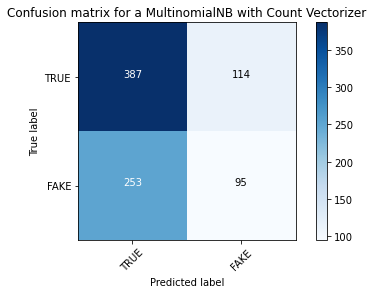

In [57]:
# Let's re-run our fine-tuned model and plot the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.30)
scores = cross_val_score(nb_classifier, count_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
precision_recall(y_test, pred_nb_count)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1])
    
    
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

0.5577263923265962 0.010954404455277565
Precision: 0.443609
Recall: 0.339080
Accuracy: 0.554770
F1 Score: 0.384365


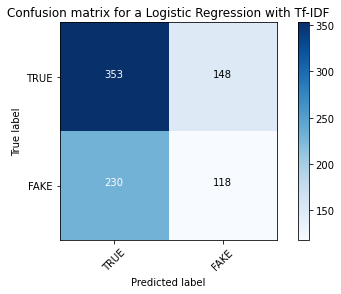

In [58]:
logreg = LogisticRegression(C=1e5)
scores = cross_val_score(logreg, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
logreg.fit(tfidf_train, y_train)
pred_logreg_tfidf = logreg.predict(tfidf_test)
pred_logreg_tfidf_proba = logreg.predict_proba(tfidf_test)[:,1]
precision_recall(y_test, pred_logreg_tfidf)

cm4 = metrics.confusion_matrix(y_test, pred_logreg_tfidf, labels=[0,1])
plot_confusion_matrix(cm4, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Tf-IDF')

0.527831531018782 0.009048278442285732
Precision: 0.431429
Recall: 0.433908
Accuracy: 0.533569
F1 Score: 0.432665


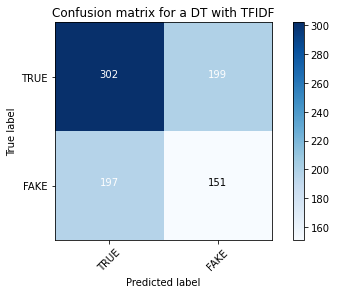

In [59]:
dtclass = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
scores = cross_val_score(dtclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
dtclass.fit(tfidf_train, y_train)
pred_dt_count = dtclass.predict(tfidf_test)
precision_recall(y_test, pred_dt_count)

cm5 = metrics.confusion_matrix(y_test, pred_dt_count, labels=[0,1])
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='Confusion matrix for a DT with TFIDF')

0.579381874495374 0.014040933061758819
Precision: 0.454545
Recall: 0.215517
Accuracy: 0.572438
F1 Score: 0.292398


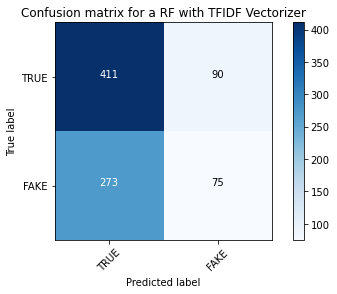

In [60]:
rfclass = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
scores = cross_val_score(rfclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
rfclass.fit(tfidf_train, y_train)
pred_rf_count = rfclass.predict(tfidf_test)
precision_recall(y_test, pred_rf_count)

cm6 = metrics.confusion_matrix(y_test, pred_rf_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a RF with TFIDF Vectorizer')

0.5773887837354899 0.013539093861485675
Precision: 0.447514
Recall: 0.232759
Accuracy: 0.567727
F1 Score: 0.306238


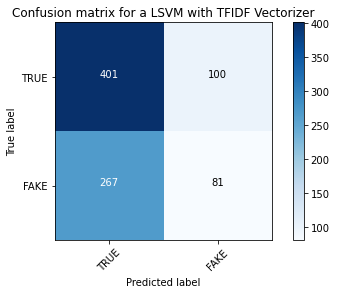

In [61]:
svclass = SVC(kernel = 'linear', random_state = 0)
scores = cross_val_score(svclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
svclass.fit(tfidf_train, y_train)
pred_sv_count = svclass.predict(tfidf_test)
precision_recall(y_test, pred_sv_count)

cm6 = metrics.confusion_matrix(y_test, pred_sv_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a LSVM with TFIDF Vectorizer')

0.5332812713707737 0.0222130473528451
Precision: 0.434932
Recall: 0.364943
Accuracy: 0.545347
F1 Score: 0.396875


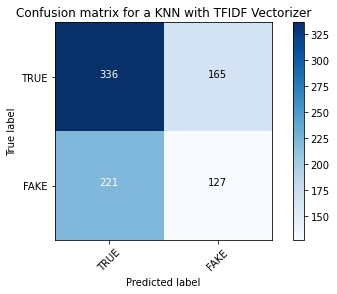

In [62]:
knnclass = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
scores = cross_val_score(knnclass, tfidf_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores), np.std(scores))
knnclass.fit(tfidf_train, y_train)
pred_knn_count = knnclass.predict(tfidf_test)
precision_recall(y_test, pred_knn_count)

cm6 = metrics.confusion_matrix(y_test, pred_knn_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a KNN with TFIDF Vectorizer')